In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
keras.__version__

'2.4.0'

# **Image Classifier using the Sequential API**
- Using Fashion MNIST

In [ ]:
  #Loading the dataset
  fashion_mnist = keras.datasets.fashion_mnist
  (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
#Creating scaled validation and train sets
X_val, X_train = X_train_full[:5000]/255.0, X_train_full[5000:] / 255.0
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

- Creating the model

In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300, activation='relu'),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

### **Points to note:** 
- Sequential model provides a single stack of layers connected sequentially.
- **Flatter layer** - 1st layer of the model.
  - Converts each input image into a 1D array.
  - i.e if it receives input data X , it computes X.reshape(-1, 1).
  - can also use **keras.layers.InputLayer**.
- **Dense Layer** - Manages own weight matrix (connection weights) of 300 neurons + bias neuron and the inputs.
- **Output Layer (Dense)** - 10 neurons which predict the class using the softmax activation function.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden2 = model.layers[2]
print(hidden2.name)
model.get_layer('dense_1') is hidden2

dense_1


True

In [ ]:
weights, biases = hidden2.get_weights()

In [ ]:
weights
#Weights randomly initialized to break symmetry

array([[-0.02917467,  0.00286523, -0.10587546, ...,  0.11216355,
        -0.11815788,  0.06023564],
       [ 0.06502882,  0.02196876, -0.07664464, ...,  0.0979246 ,
         0.02710102, -0.05366995],
       [ 0.03592055,  0.12227464,  0.07437467, ..., -0.02456796,
         0.0236944 , -0.02573381],
       ...,
       [-0.07869992, -0.11819616,  0.02355132, ..., -0.05917171,
         0.02217358,  0.05246992],
       [ 0.04570452, -0.08791241,  0.06829647, ...,  0.04619998,
         0.0023229 ,  0.00632677],
       [ 0.0850876 , -0.11626717,  0.02760143, ..., -0.06136406,
         0.00590556, -0.063309  ]], dtype=float32)

In [ ]:
weights.shape

(300, 100)

- Compiling the model
  - We use sparse_categorical_crossentropy since we have sparse labels i.e for each instance there is just a target class index (0-9)
  - if we were using one-hot vectors (then we can use categorical_crossentropy)
  - For binary classification, we can use binary_crossentropy loss

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7382 - accuracy: 0.7586 - val_loss: 0.5186 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4912 - accuracy: 0.8295 - val_loss: 0.4732 - val_accuracy: 0.8290
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4462 - accuracy: 0.8435 - val_loss: 0.4186 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4175 - accuracy: 0.8535 - val_loss: 0.4231 - val_accuracy: 0.8522
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3965 - accuracy: 0.8612 - val_loss: 0.4003 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3803 - accuracy: 0.8663 - val_loss: 0.3708 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3670 - accuracy: 0.8702 - val_loss: 0.3784 - val_accuracy:

- *class_weight* param in fit() can help give a larger weight to underrepresented classes and a lower weight to overrepresented classes.
  - These weights are used by Keras when computing the loss

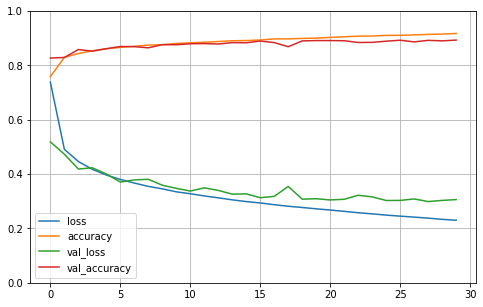

In [ ]:
pd.DataFrame(hist.history).plot(figsize=(8, 5)) #hist.history contains the loss and other extra metrics. Can plot the learning curves with this.
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- Both the training accuracy and the validation accuracy
steadily increase during training, while the training loss and the validation
loss decrease.
- When plotting the training curve, it should be shifted by half an epoch to the left.

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 0.8754


[0.3486558496952057, 0.8754000067710876]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
  y_model = model.predict_classes(X_new)
  y_model

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_model]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

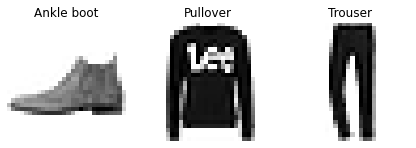

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# **Regression MLP using Sequential**

In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

- The main differences between reg and clf model designs are:
  - o/p layer has a single neuron (since we're predicting a single value)
  - uses no activation function
  - loss function used: mean squared error

In [ ]:
model = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
  keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.8674 - val_loss: 0.5168
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4956 - val_loss: 0.4494
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4492 - val_loss: 0.4295
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4300 - val_loss: 0.4167
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4205 - val_loss: 0.4042
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4139 - val_loss: 0.3947
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4095 - val_loss: 0.3932
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4033 - val_loss: 0.4148
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4102 - val_loss: 0.3863
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3952 - val_loss: 0.3829

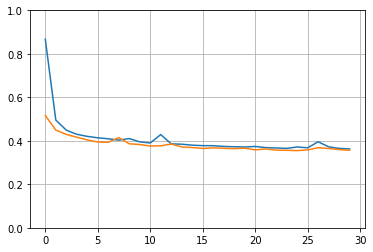

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 867us/step - loss: 0.3614


0.36143454909324646

In [11]:
X_new = X_test[:3] # pretend these are new instances

In [ ]:
y_pred = model.predict(X_new)
y_pred

array([[1.7458103],
       [1.8336592],
       [1.9972527]], dtype=float32)

# **Functional API**
- Used to build NN models with complex topologies, or multiple i/p, o/p.
- Ex: Wide and Deep NN.
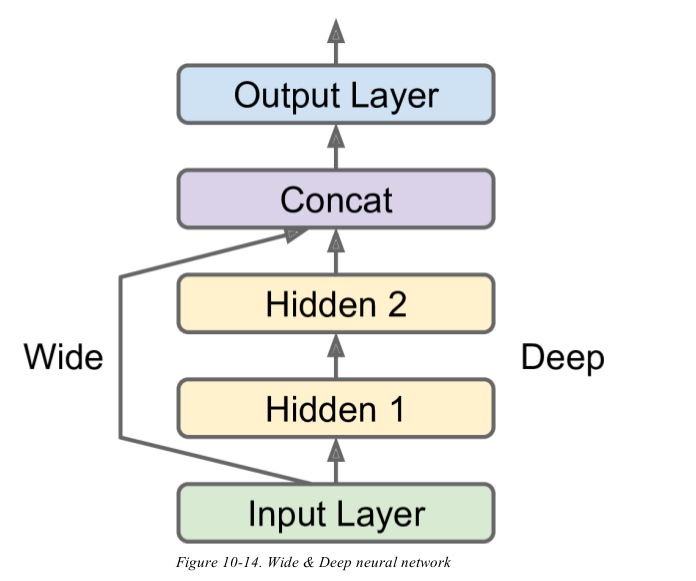
  - Connects all or part of the input to the output layer
  - This arch. makes it possible for the NN to learn deep patterns and simple rules.
  - In a regular MLP, data passes thru the entire stack of layers and the short path connection does not exist. Therefore simple patterns in the data may be distorted by the sequence of transformations.


In [37]:
inputLayer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(inputLayer) #Pass the inputLayer like a param. Tells Keras how to connect the layers. 
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([inputLayer, hidden2])  #Concatenate the output of the input layer and the second hidden layer.
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[inputLayer], outputs=[output])

In [38]:
model.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 30)           930         dense_15[0][0]                   
__________________________________________________________________________________________________
concatenate_6 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_16[0][0]        

In [39]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [40]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 2.1153 - val_loss: 0.8937
Epoch 2/40
363/363 [==============================] - 0s 1ms/step - loss: 0.7749 - val_loss: 0.6985
Epoch 3/40
363/363 [==============================] - 0s 1ms/step - loss: 0.6802 - val_loss: 0.6633
Epoch 4/40
363/363 [==============================] - 0s 1ms/step - loss: 0.6473 - val_loss: 0.6321
Epoch 5/40
363/363 [==============================] - 0s 1ms/step - loss: 0.6211 - val_loss: 0.6036
Epoch 6/40
363/363 [==============================] - 0s 1ms/step - loss: 0.6000 - val_loss: 0.5883
Epoch 7/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5805 - val_loss: 0.5647
Epoch 8/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5666 - val_loss: 0.5537
Epoch 9/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5530 - val_loss: 0.5411
Epoch 10/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5429 - val_loss: 0.5314

In [41]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)
y_pred

162/162 [==============================] - 0s 780us/step - loss: 0.4206


array([[2.8242235],
       [2.7889762],
       [1.3134944]], dtype=float32)

In [34]:
def plot_curves(history):
  plt.plot(pd.DataFrame(history.history))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()

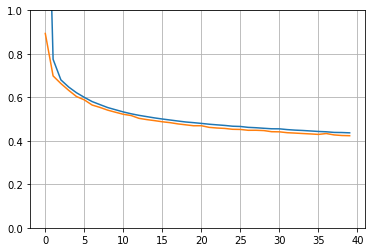

In [42]:
plot_curves(history)

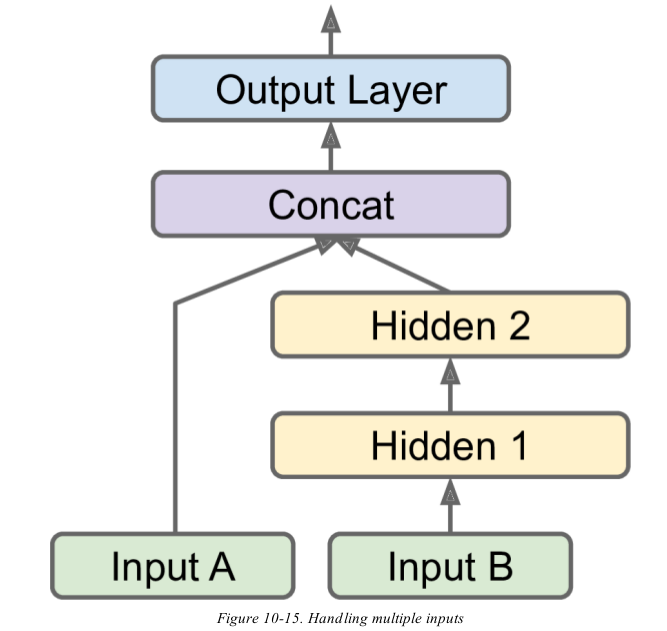

- What if we want to send a few features thru the wide path and a few via the deep path?

In [28]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1_2 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2_2 = keras.layers.Dense(30, activation='relu')(hidden1_2)
concat_2  = keras.layers.Concatenate()([input_A, hidden2_2])
output_2 = keras.layers.Dense(1, name='output')(concat_2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output_2])

In [29]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [31]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [32]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=40, validation_data=((X_val_A, X_val_B), y_val))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 2.2836 - val_loss: 0.9695
Epoch 2/40
363/363 [==============================] - 1s 1ms/step - loss: 0.8432 - val_loss: 0.7017
Epoch 3/40
363/363 [==============================] - 0s 1ms/step - loss: 0.6801 - val_loss: 0.6361
Epoch 4/40
363/363 [==============================] - 0s 1ms/step - loss: 0.6344 - val_loss: 0.6028
Epoch 5/40
363/363 [==============================] - 0s 1ms/step - loss: 0.6113 - val_loss: 0.5840
Epoch 6/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5929 - val_loss: 0.5656
Epoch 7/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5776 - val_loss: 0.5530
Epoch 8/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5653 - val_loss: 0.5406
Epoch 9/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5550 - val_loss: 0.5338
Epoch 10/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5447 - val_loss: 0.5232

In [33]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
y_pred

162/162 [==============================] - 0s 1ms/step - loss: 0.4515


array([[2.8282063],
       [2.6983597],
       [1.0469553]], dtype=float32)

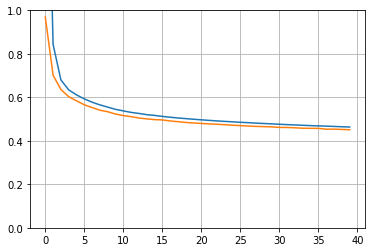

In [36]:
plot_curves(history)

# **Subclassing API**
- Advantages of Functional and Sequential API (Declarative APIs wherein we declare the layers and the connections between them):
  - Model can be easily saved, cloned and shared.
  - It's structure can be displayed and analyzed.
  - Framework can infer shapes and check types therefore errors can be caught early.
- For dynamic behaviors like loops, conditional branching etc we use the Subclassing API.
  - Separate the creation of the layers from their usage in the call() method.

In [52]:
class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs) # handles standard args (e.g., name)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

In [53]:
model = WideAndDeepModel(30, activation='relu')

In [54]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [55]:
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_val_A, X_val_B), (y_val, y_val)))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.9222 - output_1_loss: 2.7885 - output_2_loss: 4.1259 - val_loss: 1.3730 - val_output_1_loss: 1.1537 - val_output_2_loss: 3.3466
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 1.1100 - output_1_loss: 0.9124 - output_2_loss: 2.8892 - val_loss: 0.9150 - val_output_1_loss: 0.7491 - val_output_2_loss: 2.4085
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.8537 - output_1_loss: 0.7070 - output_2_loss: 2.1743 - val_loss: 0.7849 - val_output_1_loss: 0.6596 - val_output_2_loss: 1.9121
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7622 - output_1_loss: 0.6475 - output_2_loss: 1.7943 - val_loss: 0.7223 - val_output_1_loss: 0.6182 - val_output_2_loss: 1.6584
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7133 - output_1_loss: 0.6157 - output_2_loss: 1.5923 - val_loss: 0.6839 - val_output_1_loss: 0.5911 - val_ou

In [57]:
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 1ms/step - loss: 0.5933 - output_1_loss: 0.5227 - output_2_loss: 1.2287


In [58]:
model.summary #Not really helpful 

<bound method Model.summary of <__main__.WideAndDeepModel object at 0x7f6bf8b7eda0>>

# **Saving and Restoring a Model**
- HDF5 format used to save: 
  - The model’s architecture(including every layer’s hyperparameters)
  - The values of all the model parameters for every layer (e.g., connection weights and biases)
  - The optimizer (including its hyperparameters and any state it may
have).

In [59]:
np.random.seed(42)
tf.random.set_seed(42)